In [6]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from selenobot.embedders import AACEmbedder
from selenobot.files import FASTAFile
import re


%load_ext autoreload
%autoreload 2

VAL_DIR = os.path.join('..', 'data', 'validation')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
! python predict.py --input-path ./data/validation/bac120_proteins_r207_subset_max_length_2000.h5 --feature-type plm --n-classes 3
! python predict.py --input-path ./data/validation/bac120_proteins_r207_subset_max_length_2000.h5 --feature-type len --n-classes 3
! python predict.py --input-path ./data/validation/bac120_proteins_r207_subset_max_length_2000.h5 --feature-type aac --n-classes 3

! python predict.py --input-path ./data/validation/bac120_proteins_r207_subset_max_length_2000.h5 --feature-type plm --n-classes 2
! python predict.py --input-path ./data/validation/bac120_proteins_r207_subset_max_length_2000.h5 --feature-type len --n-classes 2
! python predict.py --input-path ./data/validation/bac120_proteins_r207_subset_max_length_2000.h5 --feature-type aac --n-classes 2

In [ ]:
feature_types = ['plm', 'aac', 'len']

# Read in the original metadata file, might be useful. 
gtdb_df = pd.read_csv(os.path.join(VAL_DIR, 'bac120_proteins_r207_subset_max_length_2000.csv'), index_col=0, dtype={'partial':str}) 

gtdb_ternary_results = dict()
gtdb_binary_results = dict()

for feature_type in feature_type:
    ternary_results_df = pd.read_csv(os.path.join(VAL_DIR, f'bac120_proteins_r207_subset_max_length_2000_predictions_ternary_model_{feature_type}.csv'), index_col=0, dtype={'partial':str})
    ternary_results_df = ternary_results_df[ternary_results_df.partial.str.match('00')]
    ternary_results[feature_type] = ternary_results_df

    binary_results_df = pd.read_csv(os.path.join(VAL_DIR, f'bac120_proteins_r207_subset_max_length_2000_predictions_ternary_model_{feature_type}.csv'), index_col=0, dtype={'partial':str})
    binary_results_df = binary_results_df[binary_results_df.partial.str.match('00')]
    binary_results[feature_type] = binary_results_df

In [11]:
print(f'Fraction of predicted selenoproteins in GTDB subset from ternary model:', (gtdb_plm_ternary_results_df.prediction == 1).sum() / len(gtdb_plm_ternary_results_df))
print(f'Fraction of predicted truncated non-selenoproteins in GTDB subset from ternary model:', (gtdb_plm_ternary_results_df.prediction == 2).sum() / len(gtdb_plm_ternary_results_df))
print(f'Fraction of predicted selenoproteins in GTDB subset from binary model:', (gtdb_plm_binary_results_df.prediction == 1).sum() / len(gtdb_plm_binary_results_df))

Fraction of predicted selenoproteins in GTDB subset from ternary model: 0.030330739458804854
Fraction of predicted truncated non-selenoproteins in GTDB subset from ternary model: 0.10488826701360761
Fraction of predicted selenoproteins in GTDB subset from binary model: 0.052407292129835484


In [12]:
gtdb_plm_binary_results_df

,version,genome_id,seq,start,stop,start_codon,stop_codon,gc_content,strand,rbs_motif,scaffold_id,length,partial,probability_full_length,probability_truncated_selenoprotein,prediction
id,,,,,,,,,,,,,,,,
ALAO01000001.1_1,207,GCA_000307955.1,ALNAAIEAARAGEHGKGFAVVAAEVRKLAERSGNAAGEISELSSSS...,47,589,GCC,TAG,0.683,-,NaN,1,181,1,0.997856,0.002144,0
ALAO01000002.1_1,207,GCA_000307955.1,ANKGTLFLDEIGELPIEVQAALLRVLENKTYRRVGEKEERRVDIRL...,66,695,GCC,TAG,0.630,-,NaN,2,210,1,0.876716,0.123284,0
ALAO01000003.1_1,207,GCA_000307955.1,MPRPLGLNRYSFNTLLPLATFPPLGGAGGLRPPAA,3,107,ATG,GCC,0.695,-,GGA/GAG/AGG,3,35,10,0.030489,0.969511,1
ALAO01000003.1_2,207,GCA_000307955.1,MSCRKAWWLAVAVFFCLLAAGTALGADGKEVRDVAVPGTGLALRVP...,126,806,ATG,TAG,0.678,-,GGAGG,3,227,0,0.988380,0.011620,0
ALAO01000004.1_1,207,GCA_000307955.1,AFAAAVADGDLKAVLRGRFRFELAGLAHNMERMVAELKTKLGFAQG...,1,879,GCC,GCC,0.653,+,NaN,4,293,11,0.803690,0.196310,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MWCD01000029.1_18,207,GCA_002069885.1,MADYMDEEFENEGQGELIDLSQWDEEYVNAPVEERDFDSVPDGKYQ...,21586,22083,ATG,TGA,0.544,-,GGAGG,29,166,0,0.980182,0.019818,0
MWCD01000029.1_19,207,GCA_002069885.1,MPITLPKAPTPKKNDLRNLTVLLHGGKKLGKSTFCSHLPGAIFAAT...,22109,22864,ATG,TGA,0.538,-,AGGAG,29,252,0,0.990764,0.009236,0
MWCD01000029.1_2,207,GCA_002069885.1,MIVKVGTKDLDTSNKFLRSLWADLRKSFGKCAWQYTPYKVGKENKV...,2125,3378,ATG,TAA,0.346,-,AGGA,29,418,0,0.970998,0.029002,0


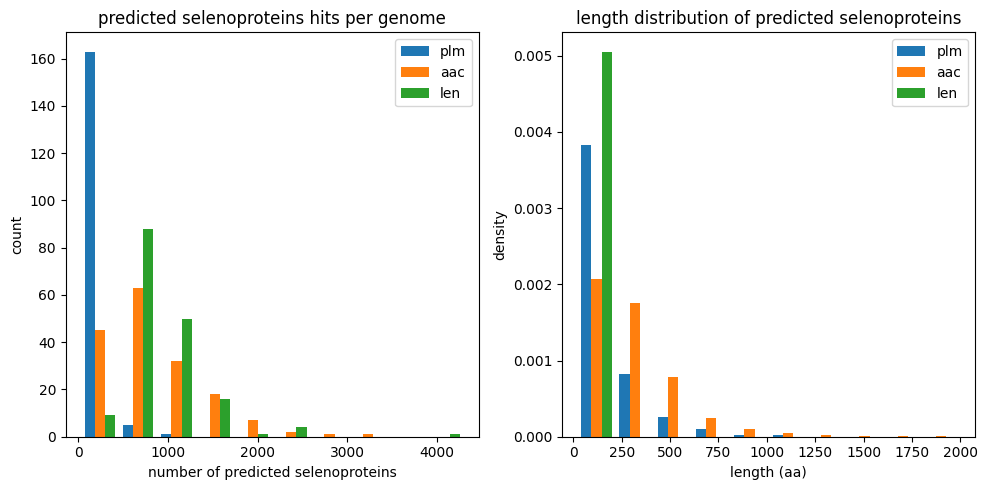

In [46]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

hits_per_genome = []
length_distribution = []
legend = []

for feature_type, df in gtdb_results.items():
    hits_per_genome.append(df[df.prediction == 1].groupby('genome_id').apply(len, include_groups=False))
    length_distribution.append(df[df.prediction == 1].length)
    legend.append(feature_type)
    
axes[0].hist(hits_per_genome)
axes[0].set_xlabel('number of predicted selenoproteins')
axes[0].set_ylabel('count')
axes[0].set_title('predicted selenoproteins hits per genome')
axes[0].legend(legend)

# length_distribution.append(gtdb_results['plm'].length) # Add the background length distribution. 
axes[1].hist(length_distribution, density=True) # , color=['tab:blue', 'tab:orange', 'tab:green', 'gray'])

axes[1].set_xlabel('length (aa)')
axes[1].set_ylabel('density')
axes[1].set_title('length distribution of predicted selenoproteins')
axes[1].legend(legend) #  + ['background'])

plt.tight_layout()
plt.show()

In [71]:
# I am a bit curious about what signals the classifiers are picking up on, particularly the composition signals. 

features_df = pd.read_hdf(os.path.join(VAL_DIR, 'bac120_proteins_r207_subset_max_length_2000.h5'), key='aac')
features_df = features_df.rename(columns={val:key for key, val in AacEmbedder.aa_to_int_map.items()})

cols = ['prediction', 'probability_truncated_selenoprotein', 'probability_full_length']
for feature_type in feature_types:
    results_df = gtdb_results[feature_type][cols].rename(columns={col:f'{feature_type}_{col}' for col in cols})
    features_df = features_df.merge(results_df, left_index=True, right_index=True)
features_df['length'] = gtdb_df.length


In [72]:
def partial_correlation(df, variable:str=None, control_for:str=None):
    
    # https://www.reddit.com/r/rstats/comments/1bbyszo/scatterplot_for_partial_correlation/
    x = df[control_for].values.ravel()
    y = df[variable].values.ravel()
    m, b = np.polyfit(x, y, deg=1) # I think this is just linear regression... 

    # Compute the residuals... 
    residuals = y - (m * x + b)
    return residuals

7.953981597148317
6.603821730905059


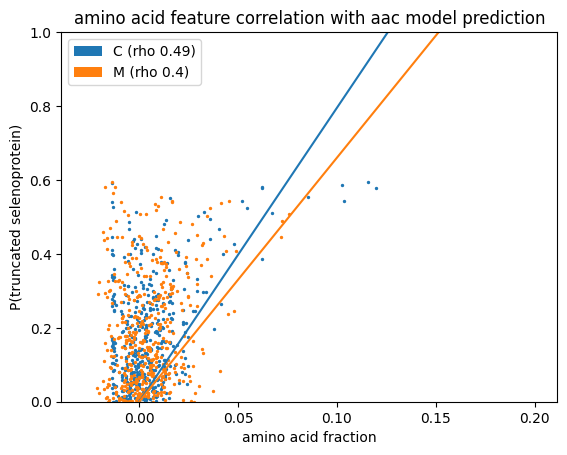

In [81]:
fig, ax = plt.subplots()

feature_type = 'aac'
legend = []
slope_threshold = 5
n = 1000

plot_x = np.linspace(0, 0.2, 25)

lines_df = []

for aa in AacEmbedder.aa_to_int_map.keys():
    if aa == 'O': # This is just full of zeros for some reason. 
        continue
    x = partial_correlation(features_df, variable=aa, control_for='length')
    y = partial_correlation(features_df, variable=f'{feature_type}_probability_truncated_selenoprotein', control_for='length')

    m, b = np.polyfit(x, y, 1)
    if abs(m) > slope_threshold:
        line = ax.plot(plot_x, plot_x * m + b)

        rho = np.round(np.corrcoef(x, y)[0, 1], 2)
        legend.append(Patch(facecolor=line[0].get_color(), label=f'{aa} (rho {rho})'))

        idxs = np.random.choice(np.arange(len(x)), n) # Only plot a subset of the points on the scatter plot. 
        ax.scatter(x[idxs], y[idxs], c=line[0].get_color(), s=2)
        print(m)
 
    lines_df.append({'aa':aa, 'm':m, 'b':b})

lines_df = pd.DataFrame(lines_df).set_index('aa')

ax.set_ylim(0, 1)
ax.set_title(f'amino acid feature correlation with {feature_type} model prediction')
ax.set_xlabel('amino acid fraction')
ax.set_ylabel('P(truncated selenoprotein)')
ax.legend(handles=legend)
plt.show()


7.87824338803195
6.388243779721526


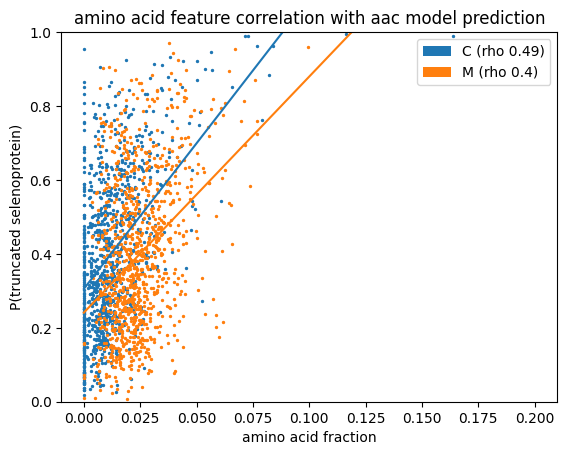

In [80]:
fig, ax = plt.subplots()

feature_type = 'aac'
legend = []
slope_threshold = 5
n = 1000

plot_x = np.linspace(0, 0.2, 25)

lines_df = []

for aa in AacEmbedder.aa_to_int_map.keys():
    if aa == 'O': # This is just full of zeros for some reason. 
        continue
    x = features_df[aa].values.ravel()
    y = features_df[f'{feature_type}_probability_truncated_selenoprotein'].values.ravel()

    m, b = np.polyfit(x, y, 1)
    if abs(m) > slope_threshold:
        line = ax.plot(plot_x, plot_x * m + b)

        rho = np.round(np.corrcoef(x, y)[0, 1], 2)
        legend.append(Patch(facecolor=line[0].get_color(), label=f'{aa} (rho {rho})'))

        idxs = np.random.choice(np.arange(len(x)), n) # Only plot a subset of the points on the scatter plot. 
        ax.scatter(x[idxs], y[idxs], c=line[0].get_color(), s=2)
        print(m)
 
    lines_df.append({'aa':aa, 'm':m, 'b':b})

lines_df = pd.DataFrame(lines_df).set_index('aa')

ax.set_ylim(0, 1)
ax.set_title(f'amino acid feature correlation with {feature_type} model prediction')
ax.set_xlabel('amino acid fraction')
ax.set_ylabel('P(truncated selenoprotein)')
ax.legend(handles=legend)
plt.show()


In [44]:
lines_df.sort_values('m')

,m,b
aa,,
D,-0.500990,0.083580
L,-0.414781,0.099491
Q,-0.344350,0.068349
Y,-0.285145,0.066216
V,-0.279452,0.077251
F,-0.223221,0.067076
I,-0.192436,0.070189
A,-0.169760,0.072050
E,-0.119102,0.065561


In [36]:
aac_embeddings[list(AacEmbedder.aa_to_int_map.keys())].values

array([[0.18333333, 0.07777778, 0.02777778, ..., 0.        , 0.00555556,
        0.07222222],
       [0.08133971, 0.11483254, 0.05741627, ..., 0.00478469, 0.02392344,
        0.05741627],
       [0.11428571, 0.08571429, 0.05714286, ..., 0.        , 0.02857143,
        0.        ],
       ...,
       [0.01595745, 0.03723404, 0.04787234, ..., 0.0212766 , 0.04787234,
        0.03723404],
       [0.04054054, 0.03716216, 0.08108108, ..., 0.00337838, 0.07432432,
        0.03716216],
       [0.10606061, 0.03030303, 0.04545455, ..., 0.03030303, 0.01515152,
        0.06060606]])